# Trabalho de Ciência de Dados - Análise de Vendas

### Objetivos: Realizar a limpeza dos dados com o uso de ferramentas de análise de dados

#### Importanbdo as bibliotecas necessárias

In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statistics import multimode
import pandas as pd
import re
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules

In [224]:
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable


### **Carregamento dos Dados**

O dataset foi carregado a partir de um arquivo '.csv' com informações de vendas. Em seguida, criei uma cópia do DataFrame original para evitar alterações acidentais na versão bruta dos dados.


In [225]:
d = pd.read_csv('vendas_modificado.csv')
df = d.copy()

### **Verificação de Dados Ausentes**
Antes de prosseguir com a análise, é importante verificar se existem valores ausentes (nulos) nas colunas. Esses dados podem afetar estatísticas e visualizações, por isso precisam ser tratados se existirem.


In [226]:
df.isnull().sum()

id_da_compra       0
data               0
hora               0
cliente            0
produto            0
valor              0
quantidade         0
total           3685
status             0
cidade             0
estado             0
pais               0
cep                0
frete           7371
pagamento          0
vendedor        3680
marca              0
dtype: int64

### **Ordenando pelo id da compra**

In [227]:
df = df.sort_values(by="id_da_compra")
df.head(20)

,id_da_compra,data,hora,cliente,produto,valor,quantidade,total,status,cidade,estado,pais,cep,frete,pagamento,vendedor,marca
4853,0,2019-07-07,11:05:44,PEDRO SILVA RAMOS,Macarrão,"R$ 2,63",14,46.82,Aguardando Pagamento,Ouro Branco,MG,Brasil,3642XXXX,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Renata
143431,0,2019-07-07,11:05:44,PEDRO SILVA RAMOS,Sabonete,"R$ 2,4",15,46.00,Aguardando Pagamento,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Nivea
364791,0,2019-07-07,11:05:44,PEDRO SILVA RAMOS,Pasta de Dente,"R$ 2,98",9,36.82,Aguardando Pagamento,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Colgate
119876,0,2019-07-07,11:05:44,PEDRO SILVA RAMOS,Sabonete,"R$ 288,20000000000005",7,25.40,Aguardando Pgto,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Lux
158811,1,2018-08-23,17:52:53,PEDRO DA SILVA BIANQUINI,Refrigerante,"R$ 6,83",5,34.15,Pagamento Confirmado,Duque de Caxias,RJ,Brasil,25000-000,0.0,Cartão de Crédito,HENRICO VICTOR ALVES,Fanta
102491,1,2018-08-23,17:52:53,PEDRO DA SILVA BIANQUINI,Detergente,"R$ 3,45",15,51.75,Pagamento Confirmado,Duque de Caxias,RJ,Brasil,25000-000,0.0,Cartão de Crédito,HENRICO VICTOR ALVES,Minuano
219754,1,2018-08-23,17:52:53,PEDRO DA SILVA BIANQUINI,Macarrão,"R$ 3,23",8,25.84,Pagamento Confirmado,Duque de Caxias,RJ,Brasil,25000-000,0.0,Cartão de Crédito,HENRICO VICTOR ALVES,Barilla
170364,1,2018-08-23,17:52:53,PEDRO DA SILVA BIANQUINI,Sabonete,"R$ 2,37",9,21.33,Pagamento Confirmado,Duque de Caxias,RJ,Brasil,25000-000,0.0,Cartão de Crédito,HENRICO VICTOR ALVES,Dove
86920,2,2022-11-06,07:03:58,LUCAS CUNHA DE OLIVEIRA,Macarrão,"R$ 3,76",6,31.56,Aguardando Pagamento,Viçosa,MG,Brasil,36570-000,9.0,Transferência Bancária,MICAEL MALAQUIAS DE SOUZA OLIVEIRA,Barilla
52779,2,2022-11-06,07:03:58,LUCAS CUNHA DE OLIVEIRA,Café,"R$ 11,1",4,53.40,Aguardando Pagamento,Viçosa,MG,Brasil,36570-000,9.0,Transferência Bancária,MICAEL MALAQUIAS DE SOUZA OLIVEIRA,Melitta


### **Tratamento e Conversão da Coluna "valor"**

A coluna "valor" contém valores monetários representados como strings (texto), com símbolos como "R$", espaços e separadores de milhar ou decimais. Para que esses dados possam ser utilizados em análises numéricas é necessário fazer uma limpeza e conversão dos valores para o formato numérico. Abaixo estão os passos realizados:

1. Verifiquei a quantidade de valores ausentes (nulos) na coluna.
2. Removi o símbolo "R$" e espaços desnecessários.
3. Substituí vírgulas por pontos para adequar o padrão numérico.
4. Removi quaisquer caracteres que não sejam números ou pontos.
5. Converti a coluna de string para formato numérico e transformando os inválidos em NaN


In [228]:
# Exibe a quantidade de valores nulos antes da limpeza
display(df['valor'].isnull().sum())

# Remove "R$", espaços e substitui vírgulas por pontos
df["valor"] = df["valor"].astype(str).str.replace("R$", "", regex=True).str.strip()
df["valor"] = df["valor"].str.replace(",", ".", regex=True)

# Remove caracteres não numéricos e converte para numérico (float), substituindo erros por NaN
df["valor"] = df["valor"].str.replace(r"[^\d.]", "", regex=True)
df["valor"] = pd.to_numeric(df["valor"], errors="coerce")

# Exibe a quantidade de valores nulos após a limpeza
display(df['valor'].isnull().sum())


np.int64(0)

np.int64(83)

In [229]:
#mostra as instâncias que estão com os valores nulos
df[df['valor'].isnull()]

,id_da_compra,data,hora,cliente,produto,valor,quantidade,total,status,cidade,estado,pais,cep,frete,pagamento,vendedor,marca
183421,1354,2021-08-13,03:51:10,MATHEUS JOSÉ SILVA MATIAS,Café,NaN,1,11.49,Em Separação,Lima Duarte,MG,Brasil,36140-000,0.0,Boleto,LUCAS VITOR FAÇANHA NEVES,Pilão
273587,2782,2022-10-09,06:16:11,Breno MALAQUIAS DE SOUZA OLIVEIRA,Leite Integral,NaN,8,NaN,Aguardando Pagamento,Santos Dumont,MG,Brasil,36240-000,11.0,Transferência Bancária,SAMUEL HENRIQUE CAÇADOR,Elegê
251776,3139,2021-07-15,18:39:09,JOÃO PAULO ALVES ALVIM,Cerveja,NaN,20,97.00,Aguardando Pagamento,Macaé,RJ,Brasil,27900-000,20.0,Pix,VICTOR GONÇALVES DONADONI,Brahma
349995,3236,2018-07-18,20:40:18,LUCAS LACERDA PORTUGAL DA SILVA,Arroz,NaN,2,22.72,Pagamento Confirmado,Ubá,MG,Brasil,36500-000,11.0,Cartão de Crédito,CARLOS QUEIROZ DE AGUIAR,Camil
223301,3810,2018-05-12,19:53:09,JOÃO DA SILVA BIANQUINI,Manteiga,NaN,7,52.08,Pagamento Confirmado,Lagoa Dourada,MG,Brasil,36345-000,0.0,Pix,CARLOS QUEIROZ DE AGUIAR,Aviação
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311083,57927,2022-01-30,19:00:04,Breno DA SILVA BIANQUINI,Farinha de Trigo,NaN,7,35.93,Aguardando Pagamento,Itaboraí,RJ,Brasil,24800-000,18.5,Cartão de Crédito,CARLOS QUEIROZ DE AGUIAR,Dona Benta
64282,58109,2021-08-12,02:44:59,BLENDOW Araujo Kuhn,Cerveja,NaN,9,31.74,Entregue,Cataguases,MG,Brasil,36770-000,10.5,Cartão de Crédito,SAMUEL HENRIQUE CAÇADOR,Skol
272148,58573,2022-07-23,07:49:33,JOÃO Araujo Kuhn,Desinfetante,NaN,4,21.68,Em Separação,Coronel Xavier Chaves,MG,Brasil,36330-000,0.0,Cartão de Crédito,SAMUEL HENRIQUE CAÇADOR,Veja
350469,59196,2020-06-03,15:42:08,LETICIA DA SILVA BIANQUINI,Suco de Laranja,NaN,3,17.76,Pagamento Confirmado,Mariana,MG,Brasil,35420-000,0.0,Pix,MICAEL MALAQUIAS DE SOUZA OLIVEIRA,Prats


#### A coluna após o tratamento apresentou valores nulos, como ordenado no código para que se houvesse erros de conversão deveriam ser transformados em NaN. Para preencher esses valores em NaN, posteriormente irei fazer a média/moda/mediana dos produtos agrupados por nome e marca e atribuir os valores a eles de acordo com o seu correspondentes.  

### **Tratamento da coluna Produtos.**
#### Objetivo: identificar os produtos da maneira correta, uma vez que existem poucos produtos, mas como estão com seus nomes errados ou simbolos adicionados a eles demonstram uma grande quantidade.

In [230]:
#mostra os produtos únicos
df['produto'].unique()

array(['Macarrão', 'Sabonete', 'Pasta de Dente', 'Refrigerante',
       'Detergente', 'Café', 'Shampoo', 'Açúcar', 'Água Mineral',
       'Óleo de Soja', 'Pão de Forma', 'Queijo Mussarela', 'Manteiga',
       'Suco de Laranja', 'Vinho', 'Farinha de Trigo',
       'Biscoito Recheado', 'Leite Integral', 'Arroz', 'Sal', 'Feijão',
       'Papel Toalha', 'Molho de Tomate', 'Desinfetante', 'Presunto',
       'Amaciante', 'Papel Higiênico', 'Queijo Mussarela#$@!',
       'Condicionador', 'Vinho#$@!', 'Cerveja', 'Detergente#$@!',
       'Sabão em Pó', 'Sal#$@!', 'Manteiga#$@!', 'Papel Toalha#$@!',
       'Papel Higiênico#$@!', 'Desinfetante#$@!', 'Café#$@!',
       'Amaciante#$@!', 'Pasta de Dente#$@!', 'Sabonete#$@!',
       'Açúcar#$@!', 'Macarrão#$@!', 'Molho de Tomate#$@!', 'Carvão',
       'Água Mineral#$@!', 'Biscoito Recheado#$@!', 'Pão de Forma#$@!',
       'Óleo de Soja#$@!', 'Farinha de Trigo#$@!', 'Condicionador#$@!',
       'Presunto#$@!', 'Cerveja#$@!', 'Sabão em Pó#$@!', 'Arroz#$

In [231]:
#remove os caracteres especiais e espaços em branco
df["produto"] = df["produto"].str.replace(r"[^a-zA-ZÀ-ÖØ-öø-ÿ\s]", "", regex=True).str.strip()
df["produto"].unique()

array(['Macarrão', 'Sabonete', 'Pasta de Dente', 'Refrigerante',
       'Detergente', 'Café', 'Shampoo', 'Açúcar', 'Água Mineral',
       'Óleo de Soja', 'Pão de Forma', 'Queijo Mussarela', 'Manteiga',
       'Suco de Laranja', 'Vinho', 'Farinha de Trigo',
       'Biscoito Recheado', 'Leite Integral', 'Arroz', 'Sal', 'Feijão',
       'Papel Toalha', 'Molho de Tomate', 'Desinfetante', 'Presunto',
       'Amaciante', 'Papel Higiênico', 'Condicionador', 'Cerveja',
       'Sabão em Pó', 'Carvão', 'ieijão', 'Manteigt', 'Mopho de Tomate',
       'Papel Twalha', 'Arroc', 'Presuntd', 'Deqergente', 'zabonete',
       'Mqcarrão', 'Água Mineras', 'Açúcaz', 'Deterwente', 'Macirrão',
       'Macawrão', 'Cnfé', 'Água Mineual', 'Scl', 'Desinfetanue', 'tal',
       'Majarrão', 'Amaciayte', 'Qbeijo Mussarela', 'Refrigkrante',
       'Sucoyde Laranja', 'Papel qoalha', 'Queijo Mussarelz', 'Clfé',
       'Sabonepe', 'Farinha de Tripo', 'Molmo de Tomate',
       'Biscoitq Recheado', 'Caft', 'Condibionador'

In [232]:
#mapeiamento dos produtos
# Corrige os nomes dos produtos com erros de digitação ou formatação
mapeamento_produtos = {
    "Refrigkrante": "Refrigerante",
    "Scl": "Sal",
    "Papel qoalha": "Papel Toalha",
    "Desinfetanue": "Desinfetante",
    "Qbeijo Mussarela": "Queijo Mussarela",
    "Água Mineras": "Água Mineral",
    "Presuntd": "Presunto",
    "Macawrão": "Macarrão",
    "Sucoyde Laranja": "Suco de Laranja",
    "Clfé": "Café",
    "Desinfekante": "Desinfetante",
    "Majarrão": "Macarrão",
    "Cnfé": "Café",
    "Farinha de Tripo": "Farinha de Trigo",
    "Manteigt": "Manteiga",
    "zabonete": "Sabonete",
    "Mqcarrão": "Macarrão",
    "Arroc": "Arroz",
    "tal": "Sal",
    "Sabonepe": "Sabonete",
    "Papel Twalha": "Papel Toalha",
    "Água Mineual": "Água Mineral",
    "Condicioiador": "Condicionador",
    "Condibionador": "Condicionador",
    "Caft": "Café",
    "ieijão": "Feijão",
    "Açúcaz": "Açúcar",
    "Amaciayte": "Amaciante",
    "Caff": "Café",
    "Mopho de Tomate": "Molho de Tomate",
    "Molmo de Tomate": "Molho de Tomate",
    "Biscoitq Recheado": "Biscoito Recheado",
    "Macirrão": "Macarrão",
    "Deqergente": "Detergente",
    "Cafc": "Café",
    "Queijo Mussarelz": "Queijo Mussarela",
    "Deterwente": "Detergente"
}
# Aplica o mapeamento para corrigir os nomes dos produtos
df["produto"] = df["produto"].replace(mapeamento_produtos)
# Remove espaços em branco adicionais
df["produto"] = df["produto"].str.strip()
#mostra os produtos únicos após o mapeamento
df["produto"].unique()

array(['Macarrão', 'Sabonete', 'Pasta de Dente', 'Refrigerante',
       'Detergente', 'Café', 'Shampoo', 'Açúcar', 'Água Mineral',
       'Óleo de Soja', 'Pão de Forma', 'Queijo Mussarela', 'Manteiga',
       'Suco de Laranja', 'Vinho', 'Farinha de Trigo',
       'Biscoito Recheado', 'Leite Integral', 'Arroz', 'Sal', 'Feijão',
       'Papel Toalha', 'Molho de Tomate', 'Desinfetante', 'Presunto',
       'Amaciante', 'Papel Higiênico', 'Condicionador', 'Cerveja',
       'Sabão em Pó', 'Carvão'], dtype=object)

### **Padronização da Coluna "produto"**

A coluna 'produto' apresentava muitas inconsistências, como erros de digitação, caracteres especiais indevidos e grafias variadas para o mesmo item. Para garantir a integridade da análise e evitar duplicidades, fiz isso aqui:

1. **Remoção de caracteres especiais:** Utilizando expressões regulares, eliminamos tudo o que não fosse letra ou espaço.
2. **Correção de valores incorretos:** Criei um dicionário de mapeamento com os nomes incorretos como chave e o nome padronizado como valor. Isso garante que produtos semelhantes sejam agrupados corretamente.
3. **Padronização de espaços e limpeza final:** Após a substituição.



In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 368752 entries, 4853 to 255401
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id_da_compra  368752 non-null  int64  
 1   data          368752 non-null  object 
 2   hora          368752 non-null  object 
 3   cliente       368752 non-null  object 
 4   produto       368752 non-null  object 
 5   valor         368669 non-null  float64
 6   quantidade    368752 non-null  int64  
 7   total         365067 non-null  float64
 8   status        368752 non-null  object 
 9   cidade        368752 non-null  object 
 10  estado        368752 non-null  object 
 11  pais          368752 non-null  object 
 12  cep           368752 non-null  object 
 13  frete         361381 non-null  float64
 14  pagamento     368752 non-null  object 
 15  vendedor      365072 non-null  object 
 16  marca         368752 non-null  object 
dtypes: float64(3), int64(2), object(12)
memory usage: 

### **Ajustando os tipos das colunas data e hora.**
#### Objetivo: Padronizar para o modelo comumente utilizado

In [234]:
#padroniza os tipos de dados das colunas 'data' e 'hora' para o que foi pedido no enunciado do trabalho
df['data'] = pd.to_datetime(df['data'], errors='coerce')
df['hora'] = pd.to_datetime(df['hora'], format='%H:%M:%S')
display(df[['hora']].head())

,hora
4853,1900-01-01 11:05:44
143431,1900-01-01 11:05:44
364791,1900-01-01 11:05:44
119876,1900-01-01 11:05:44
158811,1900-01-01 17:52:53


In [235]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 368752 entries, 4853 to 255401
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id_da_compra  368752 non-null  int64         
 1   data          368752 non-null  datetime64[ns]
 2   hora          368752 non-null  datetime64[ns]
 3   cliente       368752 non-null  object        
 4   produto       368752 non-null  object        
 5   valor         368669 non-null  float64       
 6   quantidade    368752 non-null  int64         
 7   total         365067 non-null  float64       
 8   status        368752 non-null  object        
 9   cidade        368752 non-null  object        
 10  estado        368752 non-null  object        
 11  pais          368752 non-null  object        
 12  cep           368752 non-null  object        
 13  frete         361381 non-null  float64       
 14  pagamento     368752 non-null  object        
 15  vendedor      36507

id_da_compra       0
data               0
hora               0
cliente            0
produto            0
valor             83
quantidade         0
total           3685
status             0
cidade             0
estado             0
pais               0
cep                0
frete           7371
pagamento          0
vendedor        3680
marca              0
dtype: int64

#### A padronização foi bem sucedida, tanto a coluna de hr e data não demonstraram erros

In [236]:
df.head(5)

,id_da_compra,data,hora,cliente,produto,valor,quantidade,total,status,cidade,estado,pais,cep,frete,pagamento,vendedor,marca
4853,0,2019-07-07,1900-01-01 11:05:44,PEDRO SILVA RAMOS,Macarrão,2.63,14,46.82,Aguardando Pagamento,Ouro Branco,MG,Brasil,3642XXXX,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Renata
143431,0,2019-07-07,1900-01-01 11:05:44,PEDRO SILVA RAMOS,Sabonete,2.40,15,46.00,Aguardando Pagamento,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Nivea
364791,0,2019-07-07,1900-01-01 11:05:44,PEDRO SILVA RAMOS,Pasta de Dente,2.98,9,36.82,Aguardando Pagamento,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Colgate
119876,0,2019-07-07,1900-01-01 11:05:44,PEDRO SILVA RAMOS,Sabonete,288.20,7,25.40,Aguardando Pgto,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Lux
158811,1,2018-08-23,1900-01-01 17:52:53,PEDRO DA SILVA BIANQUINI,Refrigerante,6.83,5,34.15,Pagamento Confirmado,Duque de Caxias,RJ,Brasil,25000-000,0.0,Cartão de Crédito,HENRICO VICTOR ALVES,Fanta


### **Tratamento da coluna status**
#### Objetivo: A coluna apresenta repetições escritas da maneira errada, vamos padronizar para facilitar nosso processo

In [237]:
df['status'].unique()

array(['Aguardando Pagamento', 'Aguardando Pgto', 'Pagamento Confirmado',
       'Entregue', 'Em Separação', 'Sep', 'Separando', 'AP',
       'Em Transporte', 'Pgto Confirmado', 'PC', 'Transp',
       'Transportando', 'aguardando pagamento', 'Entg',
       'Entregue com Sucesso'], dtype=object)

In [238]:
#padronizando os nomes nas colunas
df['status'] = df['status'].str.lower().str.strip()
mapeamento_status = {
    "pagamento confirmado": "Pagamento Confirmado",
    "em separação": "Em Separação",
    "entregue com sucesso": "Entregue",
    "aguardando pagamento": "Aguardando Pagamento",
    "em transporte": "Em Transporte",
    "ap": "Aguardando Pagamento",
    "entregue": "Entregue",
    "pc": "Pagamento Confirmado",
    "sep": "Em Separação",
    "separando": "Em Separação",
    "pgto confirmado": "Pagamento Confirmado",
    "transp": "Em Transporte",
    "transportando": "Em Transporte",
    "entg": "Entregue",
    "aguardando pgto": "Aguardando Pagamento"
}
df["status"] = df["status"].replace(mapeamento_status)
df['status'].unique()

df['status'].unique()

array(['Aguardando Pagamento', 'Pagamento Confirmado', 'Entregue',
       'Em Separação', 'Em Transporte'], dtype=object)

<Axes: title={'center': 'Distribuição dos Status'}, xlabel='status'>

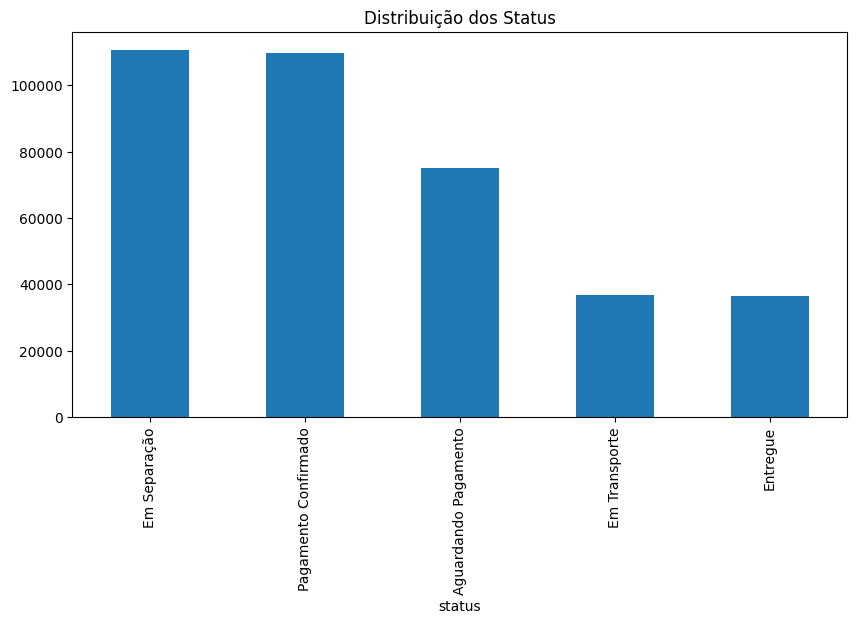

In [239]:
#mostra a quantidade de status em um gráfico de barras
df['status'].value_counts().plot(kind='bar', title='Distribuição dos Status', figsize=(10,5))


### **Padronização da Coluna "status"**

A coluna 'status' apresentava muitas inconsistências, como erros de digitação, grafias variadas para o mesmo item. Para garantir a integridade da análise e evitar duplicidades, realizei as seguintes ações:

1. **Conversão para Minúsculo e Remoção de Espaços: Todos os valores da coluna status foram convertidos para minúsculo e tiveram os espaços extras removidos, depois coloquei as iniciais em maiúsculo**
2. **Mapeamento e Substituição dos itens com base em um dicionário criado para padronizar evitando valores abreviados ou incorretos**


### **Padronização do pagamento**
#### objetivo: diminuir o número de formas de pagamentos que estão repetidos

In [240]:
df["pagamento"].unique()

array(['Cartão de Crédito', 'Transferência Bancária', 'Pix', 'DOC',
       'Cartão Crédito', 'Boleto', 'Boleto à Vista',
       'Cartão Crédito à Vista', 'Pix à Vista', 'TED',
       'Pagamento Instantâneo', 'Boleto no Dinheiro'], dtype=object)

In [241]:
#padroniza os nomes nas colunas para minúsculo e remove espaços em branco
df['pagamento'] = df['pagamento'].str.lower().str.strip()

mapeamento_pagamento = {
    "cartão de crédito": "Cartão de Crédito",
    "pix": "Pix",
    "transferência bancária": "Transferência Bancária",
    "boleto": "Boleto",
    "pix à vista": "Pix",
    "cartão crédito à vista": "Cartão de Crédito",
    "pagamento instantâneo": "Pix",
    "cartão crédito": "Cartão de Crédito",
    "boleto à vista": "Boleto",
    "doc": "Transferência Bancária",
    "ted": "Transferência Bancária",
    "boleto no dinheiro": "Boleto"
}
# Aplica o mapeamento para corrigir os nomes dos métodos de pagamento
df["pagamento"] = df["pagamento"].replace(mapeamento_pagamento)
#mostra os métodos de pagamento únicos após o mapeamento
df['pagamento'].unique()


array(['Cartão de Crédito', 'Transferência Bancária', 'Pix', 'Boleto'],
      dtype=object)

<Axes: title={'center': 'Distribuição dos Tipos de Pagamento'}, xlabel='pagamento'>

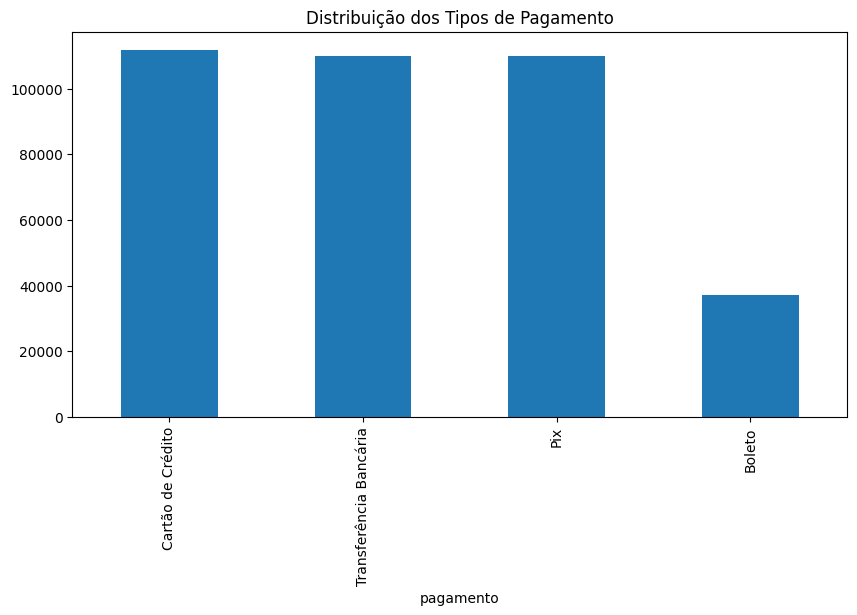

In [242]:
#mostra a quantidade de métodos de pagamento em um gráfico de barras
df['pagamento'].value_counts().plot(kind='bar', title='Distribuição dos Tipos de Pagamento', figsize=(10,5))


### **Padronização da Coluna "pagamento"**

1. **Conversão para Minúsculo e Remoção de Espaços:** Todos os valores da coluna 'pagamento' foram convertidos para minúsculo e tiveram os espaços extras removidos.
   
2. **Mapeamento e Substituição:** Criei um dicionário de mapeamento para substituir variações e abreviações por versões padronizadas ex: "pix à vista" foi substituído por "Pix", "cartão de crédito" por "Cartão de Crédito".

3. **Verificação dos Valores Únicos:** Após a substituição, foi verificado se a coluna 'pagamento' continha os valores esperados.

In [243]:
df.head(5)

,id_da_compra,data,hora,cliente,produto,valor,quantidade,total,status,cidade,estado,pais,cep,frete,pagamento,vendedor,marca
4853,0,2019-07-07,1900-01-01 11:05:44,PEDRO SILVA RAMOS,Macarrão,2.63,14,46.82,Aguardando Pagamento,Ouro Branco,MG,Brasil,3642XXXX,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Renata
143431,0,2019-07-07,1900-01-01 11:05:44,PEDRO SILVA RAMOS,Sabonete,2.40,15,46.00,Aguardando Pagamento,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Nivea
364791,0,2019-07-07,1900-01-01 11:05:44,PEDRO SILVA RAMOS,Pasta de Dente,2.98,9,36.82,Aguardando Pagamento,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Colgate
119876,0,2019-07-07,1900-01-01 11:05:44,PEDRO SILVA RAMOS,Sabonete,288.20,7,25.40,Aguardando Pagamento,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Lux
158811,1,2018-08-23,1900-01-01 17:52:53,PEDRO DA SILVA BIANQUINI,Refrigerante,6.83,5,34.15,Pagamento Confirmado,Duque de Caxias,RJ,Brasil,25000-000,0.0,Cartão de Crédito,HENRICO VICTOR ALVES,Fanta


#### **Tratamento da coluna "marca"**


In [244]:
df['marca'].unique()

array(['Renata', 'Nivea', 'Colgate', 'Lux', 'Fanta', 'Minuano', 'Barilla',
       'Dove', 'Melitta', 'Pantene', 'União', 'Minalba', 'Coamo',
       'Nutrella', 'Tirolez', 'Aviação', 'Dafruta', 'Salton', 'Del Valle',
       'Coca-Cola', 'Anaconda', 'Prats', 'Nestlé', 'Piracanjuba', 'Camil',
       'Cisne', 'Namorado', 'Snob', 'Fugini', 'Pinho Sol', 'Porto Alegre',
       'Sadia', 'São Lourenço', 'Elegê', 'Itambé', 'Confort', 'Oral-B',
       'Sorriso', 'Neve', 'Qualy', 'Quatá', 'Pilão', 'Pullman',
       'Tio João', 'Limpol', 'Adria', 'Perdigão', 'Personal',
       'Dona Benta', 'Elefante', 'Scott', 'Liza', '3 Corações', 'Soya',
       'Kicaldo', 'Itamarati', 'Caravelas', 'Sol', 'Lysoform',
       'Concha y Toro', 'Bauducco', 'Heineken', 'Seda', 'Predilecta',
       'Triunfo', 'Brahma', 'Caldo Bom', 'Skol', 'Aurora', 'Elite',
       'Dualette', 'Marinho', 'Veja', 'Urbano', 'Tixan',
       'Guaraná Antártica', 'Lebre', 'Wickbold', 'Ypê', 'Miolo',
       'Crystal', 'Downy', 'Fofo', 'Omo',

### A coluna 'marca' não apresentou erros o inconsistências ao meu ver

In [245]:
df.isnull().sum()

id_da_compra       0
data               0
hora               0
cliente            0
produto            0
valor             83
quantidade         0
total           3685
status             0
cidade             0
estado             0
pais               0
cep                0
frete           7371
pagamento          0
vendedor        3680
marca              0
dtype: int64

### **Limpeza e padronização da coluna "vendedor"** 
#### A Coluna apresenta muitos campos faltantes, para solucionar o problema vou agrupar as vendas por id, garantindo que todas as vendas que tenham o mesmo id tenha sido feita pelo mesmo vendedor, resolvendo assim os campos faltantes dos vendedores

In [246]:
#agrupa os vendedores por id_da_compra e preenche os valores nulos com o valor mais frequente
df['vendedor'] = df.groupby('id_da_compra')['vendedor'].transform(lambda x: x.ffill().bfill())
#mostra a quantidade de valores nulos após o preenchimento
df['vendedor'].isnull().sum()


C:\Users\micae\AppData\Local\Temp\ipykernel_5104\3688285536.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['vendedor'] = df.groupby('id_da_compra')['vendedor'].transform(lambda x: x.ffill().bfill())


np.int64(2)

In [247]:
#mostra pra gente onde estão os valores nulos do vendedor
df_vendedor_nulo = df[df['vendedor'].isna()]
display(df_vendedor_nulo)

,id_da_compra,data,hora,cliente,produto,valor,quantidade,total,status,cidade,estado,pais,cep,frete,pagamento,vendedor,marca
156700,13035,2022-05-22,1900-01-01 14:54:49,JOÃO DA CUNHA TEIXEIRA,Feijão,7.93,3,NaN,Pagamento Confirmado,Cabo Frio,RJ,Brasil,28900-000,0.0,Cartão de Crédito,NaN,Kicaldo
99695,13035,2022-05-22,1900-01-01 14:54:49,JOÃO DA CUNHA TEIXEIRA,Desinfetante,5.31,11,58.41,Pagamento Confirmado,Cabo Frio,RJ,Brasil,28900-000,0.0,Cartão de Crédito,NaN,Lysoform


In [248]:
# Preenche os valores nulos restantes com "Desconhecido"
df['vendedor'] = df['vendedor'].fillna("Desconhecido")
df['vendedor'].isnull().sum()


np.int64(0)

### **Tratamento de Valores Nulos na Coluna "vendedor"**

1. **Preenchimento dos Valores Nulos:** Agrupei os dados pela coluna 'id_da_compra' e preenchi os dados baseados nas instâncias anteriores ou psoteriores como tinha mencionado.
2. **Identificação de Valores Nulos Restantes:** Após o preenchimento verifiquei quantos valores nulos ainda existiam na coluna.

Duas tuplas mesmo depois do agrupamento apresnetaram valor NaN indicando que o vendedor nesse caso não foi possível ser ajustado, para não diminuir o valor da limpoeza no momento da verificação por conta do dado faltante atribui a essas duas tuplas o valor "Desconhecido.

In [249]:
df.head(7)

,id_da_compra,data,hora,cliente,produto,valor,quantidade,total,status,cidade,estado,pais,cep,frete,pagamento,vendedor,marca
4853,0,2019-07-07,1900-01-01 11:05:44,PEDRO SILVA RAMOS,Macarrão,2.63,14,46.82,Aguardando Pagamento,Ouro Branco,MG,Brasil,3642XXXX,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Renata
143431,0,2019-07-07,1900-01-01 11:05:44,PEDRO SILVA RAMOS,Sabonete,2.40,15,46.00,Aguardando Pagamento,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Nivea
364791,0,2019-07-07,1900-01-01 11:05:44,PEDRO SILVA RAMOS,Pasta de Dente,2.98,9,36.82,Aguardando Pagamento,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Colgate
119876,0,2019-07-07,1900-01-01 11:05:44,PEDRO SILVA RAMOS,Sabonete,288.20,7,25.40,Aguardando Pagamento,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Lux
158811,1,2018-08-23,1900-01-01 17:52:53,PEDRO DA SILVA BIANQUINI,Refrigerante,6.83,5,34.15,Pagamento Confirmado,Duque de Caxias,RJ,Brasil,25000-000,0.0,Cartão de Crédito,HENRICO VICTOR ALVES,Fanta
102491,1,2018-08-23,1900-01-01 17:52:53,PEDRO DA SILVA BIANQUINI,Detergente,3.45,15,51.75,Pagamento Confirmado,Duque de Caxias,RJ,Brasil,25000-000,0.0,Cartão de Crédito,HENRICO VICTOR ALVES,Minuano
219754,1,2018-08-23,1900-01-01 17:52:53,PEDRO DA SILVA BIANQUINI,Macarrão,3.23,8,25.84,Pagamento Confirmado,Duque de Caxias,RJ,Brasil,25000-000,0.0,Cartão de Crédito,HENRICO VICTOR ALVES,Barilla


In [250]:
df.isnull().sum()

id_da_compra       0
data               0
hora               0
cliente            0
produto            0
valor             83
quantidade         0
total           3685
status             0
cidade             0
estado             0
pais               0
cep                0
frete           7371
pagamento          0
vendedor           0
marca              0
dtype: int64

### **Tratamento da coluna "frete"**.
#### objetivo: a coluna esta com muitos valores faltantes, vou agrupar por cidade para achar o valor do frete de cada cidade e depois atribuir nos locais faltantes

In [251]:
df['cidade'].unique()

array(['Ouro Branco', 'Duque de Caxias', 'Viçosa', 'São Gonçalo',
       'São João del-Rei', 'Juiz de Fora', 'Belford Roxo',
       'Coronel Xavier Chaves', 'São Paulo', 'Simão Pereira', 'Barroso',
       'Ouro Preto', 'Lima Duarte', 'Magé', 'São Bernardo do Campo',
       'Guarulhos', 'Lagoa Dourada', 'Ewbank da Câmara', 'Ritápolis',
       'Petrópolis', 'Nova Iguaçu', 'Resende Costa', 'Carandaí', 'Muriaé',
       'Barbacena', 'Tocantins', 'Belo Horizonte', 'Itaboraí', 'Mariana',
       'São João de Meriti', 'Campinas', 'São João Nepomuceno', 'Macaé',
       'Congonhas', 'Ubá', 'Angra dos Reis', 'Tiradentes', 'Prados',
       'Cabo Frio', 'Santana do Garambéu', 'Niterói', 'Palma',
       'São José dos Campos', 'Santo André', 'Bicas',
       'Conselheiro Lafaiete', 'Santos Dumont', 'Astolfo Dutra',
       'Leopoldina', 'Matias Barbosa', 'São Vicente de Minas',
       'Cataguases', 'São Tiago', 'Volta Redonda',
       'Campos dos Goytacazes', 'Rio de Janeiro'], dtype=object)

### A coluna 'cidade' ao meu ver, não apresentou inconsistencias. Para resolver o problema do frete tive que verificar ela primeiro já que faço o agrupamento por cidade pra buscar o valor do frete.

### **Tratamento da coluna "frete".**

In [252]:
# Calcula a mediana de frete por cidade, excluindo valores negativos
mediana_frete_por_cidade = df[df['frete'] > 0].groupby('cidade')['frete'].median().to_dict()

# Substitui valores de frete negativos pela mediana da cidade correspondente
df['frete'] = df.apply(
    lambda row: row['frete'] if row['frete'] >= 0 else mediana_frete_por_cidade.get(row['cidade'], row['frete']),
    axis=1
)

print("Fretes após a correção:")
display(df.head(10))


Fretes após a correção:


,id_da_compra,data,hora,cliente,produto,valor,quantidade,total,status,cidade,estado,pais,cep,frete,pagamento,vendedor,marca
4853,0,2019-07-07,1900-01-01 11:05:44,PEDRO SILVA RAMOS,Macarrão,2.63,14,46.82,Aguardando Pagamento,Ouro Branco,MG,Brasil,3642XXXX,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Renata
143431,0,2019-07-07,1900-01-01 11:05:44,PEDRO SILVA RAMOS,Sabonete,2.40,15,46.00,Aguardando Pagamento,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Nivea
364791,0,2019-07-07,1900-01-01 11:05:44,PEDRO SILVA RAMOS,Pasta de Dente,2.98,9,36.82,Aguardando Pagamento,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Colgate
119876,0,2019-07-07,1900-01-01 11:05:44,PEDRO SILVA RAMOS,Sabonete,288.20,7,25.40,Aguardando Pagamento,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Lux
158811,1,2018-08-23,1900-01-01 17:52:53,PEDRO DA SILVA BIANQUINI,Refrigerante,6.83,5,34.15,Pagamento Confirmado,Duque de Caxias,RJ,Brasil,25000-000,0.0,Cartão de Crédito,HENRICO VICTOR ALVES,Fanta
102491,1,2018-08-23,1900-01-01 17:52:53,PEDRO DA SILVA BIANQUINI,Detergente,3.45,15,51.75,Pagamento Confirmado,Duque de Caxias,RJ,Brasil,25000-000,0.0,Cartão de Crédito,HENRICO VICTOR ALVES,Minuano
219754,1,2018-08-23,1900-01-01 17:52:53,PEDRO DA SILVA BIANQUINI,Macarrão,3.23,8,25.84,Pagamento Confirmado,Duque de Caxias,RJ,Brasil,25000-000,0.0,Cartão de Crédito,HENRICO VICTOR ALVES,Barilla
170364,1,2018-08-23,1900-01-01 17:52:53,PEDRO DA SILVA BIANQUINI,Sabonete,2.37,9,21.33,Pagamento Confirmado,Duque de Caxias,RJ,Brasil,25000-000,0.0,Cartão de Crédito,HENRICO VICTOR ALVES,Dove
86920,2,2022-11-06,1900-01-01 07:03:58,LUCAS CUNHA DE OLIVEIRA,Macarrão,3.76,6,31.56,Aguardando Pagamento,Viçosa,MG,Brasil,36570-000,9.0,Transferência Bancária,MICAEL MALAQUIAS DE SOUZA OLIVEIRA,Barilla
52779,2,2022-11-06,1900-01-01 07:03:58,LUCAS CUNHA DE OLIVEIRA,Café,11.10,4,53.40,Aguardando Pagamento,Viçosa,MG,Brasil,36570-000,9.0,Transferência Bancária,MICAEL MALAQUIAS DE SOUZA OLIVEIRA,Melitta


In [253]:
# Calcula a mediana de frete por cidade (apenas fretes positivos)
mediana_frete_por_cidade = df[df['frete'] > 0].groupby('cidade')['frete'].median().to_dict()

# Substitui fretes iguais a 0 pela mediana da cidade correspondente
df['frete'] = df.apply(
    lambda row: mediana_frete_por_cidade.get(row['cidade'], row['frete']) if row['frete'] == 0 else row['frete'],
    axis=1
)

print("Fretes após a correção:")
display(df.head(10))

Fretes após a correção:


,id_da_compra,data,hora,cliente,produto,valor,quantidade,total,status,cidade,estado,pais,cep,frete,pagamento,vendedor,marca
4853,0,2019-07-07,1900-01-01 11:05:44,PEDRO SILVA RAMOS,Macarrão,2.63,14,46.82,Aguardando Pagamento,Ouro Branco,MG,Brasil,3642XXXX,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Renata
143431,0,2019-07-07,1900-01-01 11:05:44,PEDRO SILVA RAMOS,Sabonete,2.40,15,46.00,Aguardando Pagamento,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Nivea
364791,0,2019-07-07,1900-01-01 11:05:44,PEDRO SILVA RAMOS,Pasta de Dente,2.98,9,36.82,Aguardando Pagamento,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Colgate
119876,0,2019-07-07,1900-01-01 11:05:44,PEDRO SILVA RAMOS,Sabonete,288.20,7,25.40,Aguardando Pagamento,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Lux
158811,1,2018-08-23,1900-01-01 17:52:53,PEDRO DA SILVA BIANQUINI,Refrigerante,6.83,5,34.15,Pagamento Confirmado,Duque de Caxias,RJ,Brasil,25000-000,19.0,Cartão de Crédito,HENRICO VICTOR ALVES,Fanta
102491,1,2018-08-23,1900-01-01 17:52:53,PEDRO DA SILVA BIANQUINI,Detergente,3.45,15,51.75,Pagamento Confirmado,Duque de Caxias,RJ,Brasil,25000-000,19.0,Cartão de Crédito,HENRICO VICTOR ALVES,Minuano
219754,1,2018-08-23,1900-01-01 17:52:53,PEDRO DA SILVA BIANQUINI,Macarrão,3.23,8,25.84,Pagamento Confirmado,Duque de Caxias,RJ,Brasil,25000-000,19.0,Cartão de Crédito,HENRICO VICTOR ALVES,Barilla
170364,1,2018-08-23,1900-01-01 17:52:53,PEDRO DA SILVA BIANQUINI,Sabonete,2.37,9,21.33,Pagamento Confirmado,Duque de Caxias,RJ,Brasil,25000-000,19.0,Cartão de Crédito,HENRICO VICTOR ALVES,Dove
86920,2,2022-11-06,1900-01-01 07:03:58,LUCAS CUNHA DE OLIVEIRA,Macarrão,3.76,6,31.56,Aguardando Pagamento,Viçosa,MG,Brasil,36570-000,9.0,Transferência Bancária,MICAEL MALAQUIAS DE SOUZA OLIVEIRA,Barilla
52779,2,2022-11-06,1900-01-01 07:03:58,LUCAS CUNHA DE OLIVEIRA,Café,11.10,4,53.40,Aguardando Pagamento,Viçosa,MG,Brasil,36570-000,9.0,Transferência Bancária,MICAEL MALAQUIAS DE SOUZA OLIVEIRA,Melitta


### **Tratmento de Valores de frete**

1. **Cálculo da Mediana do Frete por Cidade:** Calculei a mediana do frete para cada cidade, considerando apenas os valores de frete maiores que zero.
2. **Correção de Fretes Negativos:** Substituí os valores negativos de frete pela mediana do frete correspondente à cidade do registro. Caso não houvesse mediana disponível para a cidade, mantive o valor original.
3. **Correção de Fretes Zero:** Substituí os valores de frete igual a zero pela mediana do frete para a cidade correspondente.

*obs: usei a mediana por acreditar que essa seria a forma de deixar o valor o mais próximo do valor real já que a mediana pega o valor do meio o que automaticamente exclui outliers.*

<Axes: title={'center': 'Top 10 Cidades com Mais Registros de Frete'}, xlabel='cidade'>

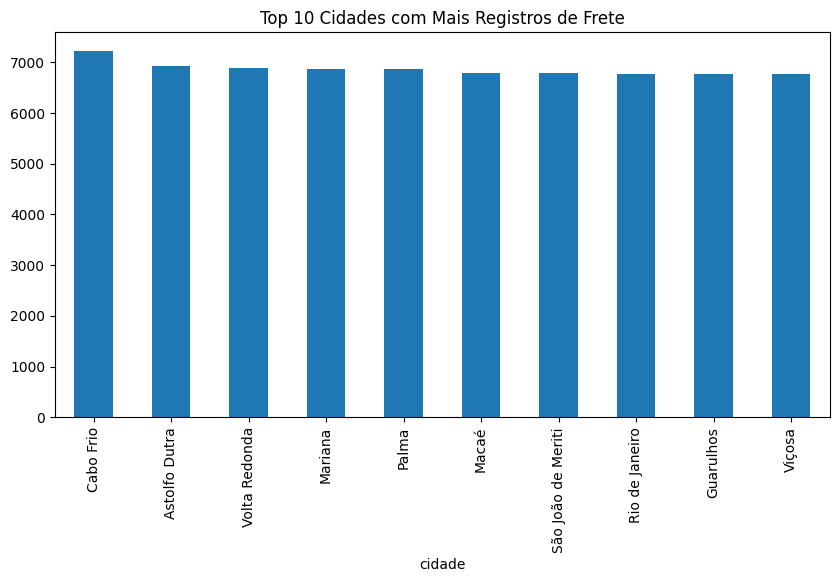

In [254]:
# Mostra um gráfico de barras com as 10 cidades que mais aparecem na coluna 'cidade'
df['cidade'].value_counts().head(10).plot(kind='bar', title='Top 10 Cidades com Mais Registros de Frete', figsize=(10,5))


In [255]:
df.isnull().sum()

id_da_compra       0
data               0
hora               0
cliente            0
produto            0
valor             83
quantidade         0
total           3685
status             0
cidade             0
estado             0
pais               0
cep                0
frete              0
pagamento          0
vendedor           0
marca              0
dtype: int64

In [256]:
df.head(5)

,id_da_compra,data,hora,cliente,produto,valor,quantidade,total,status,cidade,estado,pais,cep,frete,pagamento,vendedor,marca
4853,0,2019-07-07,1900-01-01 11:05:44,PEDRO SILVA RAMOS,Macarrão,2.63,14,46.82,Aguardando Pagamento,Ouro Branco,MG,Brasil,3642XXXX,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Renata
143431,0,2019-07-07,1900-01-01 11:05:44,PEDRO SILVA RAMOS,Sabonete,2.40,15,46.00,Aguardando Pagamento,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Nivea
364791,0,2019-07-07,1900-01-01 11:05:44,PEDRO SILVA RAMOS,Pasta de Dente,2.98,9,36.82,Aguardando Pagamento,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Colgate
119876,0,2019-07-07,1900-01-01 11:05:44,PEDRO SILVA RAMOS,Sabonete,288.20,7,25.40,Aguardando Pagamento,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Lux
158811,1,2018-08-23,1900-01-01 17:52:53,PEDRO DA SILVA BIANQUINI,Refrigerante,6.83,5,34.15,Pagamento Confirmado,Duque de Caxias,RJ,Brasil,25000-000,19.0,Cartão de Crédito,HENRICO VICTOR ALVES,Fanta


In [257]:
df.isnull().sum()


id_da_compra       0
data               0
hora               0
cliente            0
produto            0
valor             83
quantidade         0
total           3685
status             0
cidade             0
estado             0
pais               0
cep                0
frete              0
pagamento          0
vendedor           0
marca              0
dtype: int64

In [258]:
df['cep'].unique()

array(['3642XXXX', '36420-000', '25000-000', '36570-000', '24400-000',
       '36300-000', '36000-000', '26100-000', '36330-000', '01000-000',
       '36123-000', '36212-000', '35400-000', '36140-000', '25900-000',
       '09700-000', '07000-000', '36345-000', '36108-000', '36335-000',
       '25600-000', '26000-000', '36340-000', '36280-000', '36880-000',
       '26XXXXXX', '36200-000', '36510-000', '30000-000', '24800-000',
       '248XXXXX', 'X97XXXXX', '35420-000', '25500-000', '13000-000',
       '36680-000', '3668XXXX', '27900-000', '36415-000', '36415XXX',
       '36500-000', '23900-000', '36325-000', '36320-000', '28900-000',
       '36196-000', '24000-000', '36710-000', '12200-000', '3651XXXX',
       '3614XXXX', '09000-000', '36600-000', 'X1XXXXXX', '36400-000',
       '244XXXXX', '36240-000', '36780-000', '36700-000', '367XXXXX',
       '3657XXXX', '36120-000', '3688XXXX', '37370-000', '364XXXXX',
       '36770-000', '36123XXX', '36350-000', '3XXXXXXX', '27200-000',
       '

### **Tratemento e padronização da coluna "cep".**
#### Objetivo: a coluna apresenta muitos valores escritos de forma errada e despadronizada, para remover uma duplicata por exemplo é importante que tdos os valores estejam iguais para sabermos se de fato pode ser uma duplicata

In [ ]:
#função para validar o CEP
def cep_valido(cep):
    return bool(re.fullmatch(r"\d{5}-\d{3}", str(cep)))
#calcula a moda dos CEPs por cidade, excluindo CEPs inválidos
moda_ceps = (
    df[df['cep'].apply(cep_valido)]
    .groupby('cidade')['cep']
    .agg(lambda x: x.mode()[0] if not x.mode().empty else None)
    .reset_index()
)
# Renomeia a coluna 'cep' para 'cep_moda' para evitar confusão
moda_ceps.rename(columns={'cep': 'cep_moda'}, inplace=True)

# Faz o merge com o DataFrame original para adicionar a moda dos CEPs
df = df.merge(moda_ceps, on='cidade', how='left')

# Substitui os CEPs inválidos pela moda dos CEPs da cidade correspondente
df['cep'] = df.apply(
    lambda row: row['cep'] if cep_valido(row['cep']) else row['cep_moda'],
    axis=1
)
#apaga a coluna 'cep_moda' após o merge
df.drop(columns=['cep_moda'], inplace=True)


In [260]:
df['cep'].unique()

array(['36420-000', '25000-000', '36570-000', '24400-000', '36300-000',
       '36000-000', '26100-000', '36330-000', '01000-000', '36123-000',
       '36212-000', '35400-000', '36140-000', '25900-000', '09700-000',
       '07000-000', '36345-000', '36108-000', '36335-000', '25600-000',
       '26000-000', '36340-000', '36280-000', '36880-000', '36200-000',
       '36510-000', '30000-000', '24800-000', '35420-000', '25500-000',
       '13000-000', '36680-000', '27900-000', '36415-000', '36500-000',
       '23900-000', '36325-000', '36320-000', '28900-000', '36196-000',
       '24000-000', '36710-000', '12200-000', '09000-000', '36600-000',
       '36400-000', '36240-000', '36780-000', '36700-000', '36120-000',
       '37370-000', '36770-000', '36350-000', '27200-000', '28000-000',
       '20000-000'], dtype=object)

### **Tratamento e padronização de CEP**

1. Verifiquei quais ceps estavam em um formato válido e, com base nisso, calculei o CEP mais frequente por cidade.
2. Substituí os CEPs inválidos pela moda da cidade correspondente, garantindo maior consistência nos dados.

In [261]:
df.isnull().sum()

id_da_compra       0
data               0
hora               0
cliente            0
produto            0
valor             83
quantidade         0
total           3685
status             0
cidade             0
estado             0
pais               0
cep                0
frete              0
pagamento          0
vendedor           0
marca              0
dtype: int64

In [262]:
#df['marca'].unique()
df['marca'].isnull().sum()

np.int64(0)

### **Tratamento e correção da coluna "valores".**
#### objetivo: Ajustar os valores que variam de forma exorbitante a fim de permitir um calculo correto da compra posteriormente 

In [263]:
df['valor'].isnull().sum()

np.int64(83)

In [264]:
# Calcular Q1 e Q3
Q1 = df['valor'].quantile(0.25)
Q3 = df['valor'].quantile(0.75)
IQR = Q3 - Q1

# Definir limites para outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Remover outliers
df_sem_outliers = df[(df['valor'] >= limite_inferior) & (df['valor'] <= limite_superior)]

# Calcular a mediana dos valores por marca e produto
mediana_valores = df_sem_outliers.groupby(['marca', 'produto'])['valor'].median().reset_index()

# Renomear a coluna para evitar confusão
mediana_valores.rename(columns={'valor': 'valor_corrigido'}, inplace=True)

# Fazer um merge para incluir a coluna 'valor_corrigido' no DataFrame original
df = df.merge(mediana_valores[['marca', 'produto', 'valor_corrigido']], on=['marca', 'produto'], how='left')

# Exibir o DataFrame com a nova coluna 'valor_corrigido' (com mediana e sem outliers)
print("\nDataFrame com a coluna 'valor_corrigido' (usando mediana e sem outliers):")
print(df)



DataFrame com a coluna 'valor_corrigido' (usando mediana e sem outliers):
        id_da_compra       data                hora  \
0                  0 2019-07-07 1900-01-01 11:05:44   
1                  0 2019-07-07 1900-01-01 11:05:44   
2                  0 2019-07-07 1900-01-01 11:05:44   
3                  0 2019-07-07 1900-01-01 11:05:44   
4                  1 2018-08-23 1900-01-01 17:52:53   
...              ...        ...                 ...   
368747         59999 2020-05-15 1900-01-01 17:36:56   
368748         59999 2020-05-15 1900-01-01 17:36:56   
368749         59999 2020-05-15 1900-01-01 17:36:56   
368750         59999 2020-05-15 1900-01-01 17:36:56   
368751         59999 2020-05-15 1900-01-01 17:36:56   

                           cliente          produto   valor  quantidade  \
0                PEDRO SILVA RAMOS         Macarrão    2.63          14   
1                PEDRO SILVA RAMOS         Sabonete    2.40          15   
2                PEDRO SILVA RAMOS   Pa

In [265]:
df.head(15)

,id_da_compra,data,hora,cliente,produto,valor,quantidade,total,status,cidade,estado,pais,cep,frete,pagamento,vendedor,marca,valor_corrigido
0,0,2019-07-07,1900-01-01 11:05:44,PEDRO SILVA RAMOS,Macarrão,2.63,14,46.82,Aguardando Pagamento,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Renata,2.970
1,0,2019-07-07,1900-01-01 11:05:44,PEDRO SILVA RAMOS,Sabonete,2.40,15,46.00,Aguardando Pagamento,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Nivea,2.000
2,0,2019-07-07,1900-01-01 11:05:44,PEDRO SILVA RAMOS,Pasta de Dente,2.98,9,36.82,Aguardando Pagamento,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Colgate,2.990
3,0,2019-07-07,1900-01-01 11:05:44,PEDRO SILVA RAMOS,Sabonete,288.20,7,25.40,Aguardando Pagamento,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Lux,2.000
4,1,2018-08-23,1900-01-01 17:52:53,PEDRO DA SILVA BIANQUINI,Refrigerante,6.83,5,34.15,Pagamento Confirmado,Duque de Caxias,RJ,Brasil,25000-000,19.0,Cartão de Crédito,HENRICO VICTOR ALVES,Fanta,4.990
5,1,2018-08-23,1900-01-01 17:52:53,PEDRO DA SILVA BIANQUINI,Detergente,3.45,15,51.75,Pagamento Confirmado,Duque de Caxias,RJ,Brasil,25000-000,19.0,Cartão de Crédito,HENRICO VICTOR ALVES,Minuano,3.010
6,1,2018-08-23,1900-01-01 17:52:53,PEDRO DA SILVA BIANQUINI,Macarrão,3.23,8,25.84,Pagamento Confirmado,Duque de Caxias,RJ,Brasil,25000-000,19.0,Cartão de Crédito,HENRICO VICTOR ALVES,Barilla,3.005
7,1,2018-08-23,1900-01-01 17:52:53,PEDRO DA SILVA BIANQUINI,Sabonete,2.37,9,21.33,Pagamento Confirmado,Duque de Caxias,RJ,Brasil,25000-000,19.0,Cartão de Crédito,HENRICO VICTOR ALVES,Dove,2.010
8,2,2022-11-06,1900-01-01 07:03:58,LUCAS CUNHA DE OLIVEIRA,Macarrão,3.76,6,31.56,Aguardando Pagamento,Viçosa,MG,Brasil,36570-000,9.0,Transferência Bancária,MICAEL MALAQUIAS DE SOUZA OLIVEIRA,Barilla,3.005
9,2,2022-11-06,1900-01-01 07:03:58,LUCAS CUNHA DE OLIVEIRA,Café,11.10,4,53.40,Aguardando Pagamento,Viçosa,MG,Brasil,36570-000,9.0,Transferência Bancária,MICAEL MALAQUIAS DE SOUZA OLIVEIRA,Melitta,9.980


In [266]:
# Substituir valores da coluna 'valor' pelos valores corrigidos
df['valor'] = df['valor_corrigido']

# Remover a coluna auxiliar
df.drop(columns=['valor_corrigido'], inplace=True)

# Exibir o DataFrame final com valores corrigidos
print("\nDataFrame com a coluna 'valor' corrigida (mediana sem outliers):")
print(df)



DataFrame com a coluna 'valor' corrigida (mediana sem outliers):
        id_da_compra       data                hora  \
0                  0 2019-07-07 1900-01-01 11:05:44   
1                  0 2019-07-07 1900-01-01 11:05:44   
2                  0 2019-07-07 1900-01-01 11:05:44   
3                  0 2019-07-07 1900-01-01 11:05:44   
4                  1 2018-08-23 1900-01-01 17:52:53   
...              ...        ...                 ...   
368747         59999 2020-05-15 1900-01-01 17:36:56   
368748         59999 2020-05-15 1900-01-01 17:36:56   
368749         59999 2020-05-15 1900-01-01 17:36:56   
368750         59999 2020-05-15 1900-01-01 17:36:56   
368751         59999 2020-05-15 1900-01-01 17:36:56   

                           cliente          produto  valor  quantidade  total  \
0                PEDRO SILVA RAMOS         Macarrão   2.97          14  46.82   
1                PEDRO SILVA RAMOS         Sabonete   2.00          15  46.00   
2                PEDRO SILVA R

In [267]:
df.isnull().sum()

id_da_compra       0
data               0
hora               0
cliente            0
produto            0
valor              0
quantidade         0
total           3685
status             0
cidade             0
estado             0
pais               0
cep                0
frete              0
pagamento          0
vendedor           0
marca              0
dtype: int64

### **Correção de Valores**

1. Calculei os quartis Q1 e Q3 da coluna 'valor' e usei o intervalo interquartil para identificar e remover outliers.
2. Com os dados limpos, calculei a mediana dos valores agrupando por 'marca' e 'produto', garantindo uma média mais representativa por categoria.
3. Realizei o merge dessa mediana com o DataFrame original e substituí os valores da coluna 'valor' pelos valores corrigidos.

*obs: usei a mediana pelo mesmo motivo da anterior, buscar ter um valor mais próximo do real valor já que ele pega o valor do meio*


In [268]:
df['estado'].unique()

array(['MG', 'RJ', 'SP', 'PR', 'São Paulo', 'PSC', 'MTSa', 'RS'],
      dtype=object)

In [269]:
#mapeamento dos estados
correcao_do_estado = {
    "MTSa": "MS",
    "São Paulo": "SP",
    "PSC": "SC",
}
# Aplica o mapeamento para corrigir os estados
df["estado"] = df["estado"].replace(correcao_do_estado)
df['estado'].unique()

array(['MG', 'RJ', 'SP', 'PR', 'SC', 'MS', 'RS'], dtype=object)

como o estado estava com algumas variações fiz o mapeamento para padronizar

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368752 entries, 0 to 368751
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id_da_compra  368752 non-null  int64         
 1   data          368752 non-null  datetime64[ns]
 2   hora          368752 non-null  datetime64[ns]
 3   cliente       368752 non-null  object        
 4   produto       368752 non-null  object        
 5   valor         368752 non-null  float64       
 6   quantidade    368752 non-null  int64         
 7   total         365067 non-null  float64       
 8   status        368752 non-null  object        
 9   cidade        368752 non-null  object        
 10  estado        368752 non-null  object        
 11  pais          368752 non-null  object        
 12  cep           368752 non-null  object        
 13  frete         368752 non-null  float64       
 14  pagamento     368752 non-null  object        
 15  vendedor      368

In [271]:
df.head(5)

,id_da_compra,data,hora,cliente,produto,valor,quantidade,total,status,cidade,estado,pais,cep,frete,pagamento,vendedor,marca
0,0,2019-07-07,1900-01-01 11:05:44,PEDRO SILVA RAMOS,Macarrão,2.97,14,46.82,Aguardando Pagamento,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Renata
1,0,2019-07-07,1900-01-01 11:05:44,PEDRO SILVA RAMOS,Sabonete,2.00,15,46.00,Aguardando Pagamento,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Nivea
2,0,2019-07-07,1900-01-01 11:05:44,PEDRO SILVA RAMOS,Pasta de Dente,2.99,9,36.82,Aguardando Pagamento,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Colgate
3,0,2019-07-07,1900-01-01 11:05:44,PEDRO SILVA RAMOS,Sabonete,2.00,7,25.40,Aguardando Pagamento,Ouro Branco,MG,Brasil,36420-000,10.0,Cartão de Crédito,VICTOR GONÇALVES DONADONI,Lux
4,1,2018-08-23,1900-01-01 17:52:53,PEDRO DA SILVA BIANQUINI,Refrigerante,4.99,5,34.15,Pagamento Confirmado,Duque de Caxias,RJ,Brasil,25000-000,19.0,Cartão de Crédito,HENRICO VICTOR ALVES,Fanta


In [272]:
df.isnull().sum()

id_da_compra       0
data               0
hora               0
cliente            0
produto            0
valor              0
quantidade         0
total           3685
status             0
cidade             0
estado             0
pais               0
cep                0
frete              0
pagamento          0
vendedor           0
marca              0
dtype: int64

### **Correção da coluna total**
#### objetivo: Com os valores dos produtos sendo modificado o valor se torna diferente, antes mesmos eles já apresentavam incoerências e para calcular eles precisam estar ajustados.

In [273]:
#calcula o valor do total
df['total'] = (df['quantidade'] * df['valor'])

In [274]:
df.isnull().sum()

id_da_compra    0
data            0
hora            0
cliente         0
produto         0
valor           0
quantidade      0
total           0
status          0
cidade          0
estado          0
pais            0
cep             0
frete           0
pagamento       0
vendedor        0
marca           0
dtype: int64

### **Correção da coluna total**

como o total é a quantidade x o valor do produto realizamos essa multiplicação para achar os valores correspondentes e baseando também no que foi informado no pdf de apresentação do trabalho.

In [275]:
for column in df.columns:
    # Verifica se a coluna é do tipo string
    if df[column].dtype == 'object':
        # Verifica se há espaços em branco
        if (df[column] != df[column].str.strip()).any():
            print(f"A coluna '{column}' contém espaços em branco.")

A coluna 'cliente' contém espaços em branco.


In [276]:
for column in df.columns:
    # Verifica se a coluna é do tipo string
    if df[column].dtype == 'object':
        # Verifica se há espaços em branco
        if (df[column] != df[column].str.strip()).any():
            print(f"A coluna '{column}' contém espaços em branco.")

A coluna 'cliente' contém espaços em branco.


In [277]:
#remove os espaços em branco e caracteres especiais
df['cliente'] = df['cliente'].str.strip() 
df['cliente'] = df['cliente'].str.replace(r'\s+', ' ', regex=True) 


como ainda tinha uma coluna com um esopaço, removi 

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368752 entries, 0 to 368751
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id_da_compra  368752 non-null  int64         
 1   data          368752 non-null  datetime64[ns]
 2   hora          368752 non-null  datetime64[ns]
 3   cliente       368752 non-null  object        
 4   produto       368752 non-null  object        
 5   valor         368752 non-null  float64       
 6   quantidade    368752 non-null  int64         
 7   total         368752 non-null  float64       
 8   status        368752 non-null  object        
 9   cidade        368752 non-null  object        
 10  estado        368752 non-null  object        
 11  pais          368752 non-null  object        
 12  cep           368752 non-null  object        
 13  frete         368752 non-null  float64       
 14  pagamento     368752 non-null  object        
 15  vendedor      368

In [279]:
df = df.drop_duplicates()

In [280]:
#testa se o df tá certinho
def resumo_qualidade(df):
    return pd.DataFrame({
        "tipo": df.dtypes,
        "nulos": df.isnull().sum(),
        "nulos (%)": df.isnull().mean() * 100,
        "únicos": df.nunique(),
        "exemplo": df.apply(lambda x: x.unique()[:5])
    })

print(resumo_qualidade(df))


                        tipo  nulos  nulos (%)  únicos  \
id_da_compra           int64      0        0.0   60000   
data          datetime64[ns]      0        0.0     999   
hora          datetime64[ns]      0        0.0   16547   
cliente               object      0        0.0     648   
produto               object      0        0.0      31   
valor                float64      0        0.0      56   
quantidade             int64      0        0.0      24   
total                float64      0        0.0     714   
status                object      0        0.0       5   
cidade                object      0        0.0      56   
estado                object      0        0.0       7   
pais                  object      0        0.0       1   
cep                   object      0        0.0      56   
frete                float64      0        0.0      65   
pagamento             object      0        0.0       4   
vendedor              object      0        0.0      11   
marca         

In [281]:
df.to_csv('dadosLimpos.csv', index=False, encoding='utf-8')

# Regras de Associação 


In [282]:
df_grouped = df.groupby("id_da_compra")["produto"].unique().reset_index()  
df_grouped.rename(columns={"produto": "produtos"}, inplace=True)

In [283]:
# Transforma a lista de produtos agrupada por compra
transactions = df_grouped["produtos"].tolist()

# Codifica as transações
te = TransactionEncoder()
te_ary = te.fit_transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Gera os conjuntos frequentes com FPGrowth
frequent_itemsets = fpgrowth(df_encoded, min_support=0.02, use_colnames=True)

# Gera as regras com base no lift
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Remove colunas desnecessárias
colunas_desejadas = ['antecedents', 'consequents', 'support', 'confidence', 'lift']
rules_limpo = rules[colunas_desejadas]

# Adiciona um ID sequencial
rules_limpo = rules_limpo.reset_index(drop=True)
rules_limpo['id'] = rules_limpo.index + 1

# Reorganiza para mostrar o ID primeiro
rules_limpo = rules_limpo[['id'] + colunas_desejadas]

# Exibe os 100 primeiros
rules_limpo.head(100)


,id,antecedents,consequents,support,confidence,lift
0,1,(Sabonete),(Pasta de Dente),0.200600,0.716898,2.393516
1,2,(Pasta de Dente),(Sabonete),0.200600,0.669746,2.393516
2,3,"(Sabonete, Queijo Mussarela)",(Pasta de Dente),0.034150,0.604960,2.019788
3,4,"(Queijo Mussarela, Pasta de Dente)",(Sabonete),0.034150,0.556491,1.988770
4,5,(Sabonete),"(Queijo Mussarela, Pasta de Dente)",0.034150,0.122044,1.988770
...,...,...,...,...,...,...
95,96,"(Sabonete, Pasta de Dente)",(Shampoo),0.044783,0.223247,1.535750
96,97,"(Shampoo, Pasta de Dente)",(Sabonete),0.044783,0.658578,2.353607
97,98,(Sabonete),"(Shampoo, Pasta de Dente)",0.044783,0.160045,2.353607
98,99,(Shampoo),"(Sabonete, Pasta de Dente)",0.044783,0.308072,1.535750


In [284]:
from collections import Counter

# Junta todas as listas de produtos em uma só
todos_produtos = [produto for lista in df_grouped["produtos"] for produto in lista]

# Conta a frequência de cada produto
contagem = Counter(todos_produtos)

# Mostra os 10 produtos mais vendidos
mais_vendidos = contagem.most_common(10)

print("Produtos mais vendidos:")
for produto, quantidade in mais_vendidos:
    print(f"- {produto}: {quantidade} vendas")
mais_vendido = contagem.most_common(1)[0]
print(f"Produto mais vendido: {mais_vendido[0]} ({mais_vendido[1]} vendas)")


Produtos mais vendidos:
- Pasta de Dente: 17971 vendas
- Queijo Mussarela: 17761 vendas
- Manteiga: 17078 vendas
- Sabonete: 16789 vendas
- Açúcar: 15448 vendas
- Café: 15201 vendas
- Papel Toalha: 13149 vendas
- Desinfetante: 13067 vendas
- Condicionador: 10422 vendas
- Molho de Tomate: 10156 vendas
Produto mais vendido: Pasta de Dente (17971 vendas)


In [285]:
# Filtra regras com lift > 2.0 e confidence > 0.7
regras_fortes = rules_limpo[
    (rules_limpo["lift"] > 2.0) & 
    (rules_limpo["confidence"] > 0.7)
].sort_values(by=["lift", "confidence"], ascending=False)

# Mostra as 20 principais regras fortes
print("Regras fortes de associação:")
print(regras_fortes.head(20))

# Função para gerar recomendações com base em um produto
def gerar_recomendacoes(produto, regras):
    resultado = regras[
        regras["antecedents"].astype(str).str.contains(produto, case=False)
    ].sort_values(by="lift", ascending=False)
    
    if resultado.empty:
        print(f"Nenhuma recomendação encontrada para '{produto}'.")
    else:
        print(f"Recomendações para '{produto}':")
        for _, row in resultado.iterrows():
            consequente = ', '.join(list(row['consequents']))
            print(f"- {consequente} | confiança: {row['confidence']:.2f} | lift: {row['lift']:.2f}")

# Exemplo de uso
gerar_recomendacoes("Arroz", regras_fortes)


Regras fortes de associação:
      id                       antecedents         consequents   support  \
406  407                          (Carvão)           (Cerveja)  0.024050   
263  264                   (Feijão, Arroz)   (Molho de Tomate)  0.022800   
259  260                           (Arroz)   (Molho de Tomate)  0.062567   
210  211          (Leite Integral, Açúcar)              (Café)  0.032383   
363  364   (Papel Higiênico, Desinfetante)      (Papel Toalha)  0.042367   
362  363   (Papel Higiênico, Papel Toalha)      (Desinfetante)  0.042367   
250  251                    (Feijão, Café)            (Açúcar)  0.036333   
354  355       (Amaciante, Pasta de Dente)          (Sabonete)  0.038083   
173  174          (Manteiga, Pão de Forma)  (Queijo Mussarela)  0.050433   
338  339              (Manteiga, Presunto)  (Queijo Mussarela)  0.048800   
130  131  (Óleo de Soja, Queijo Mussarela)          (Manteiga)  0.048967   
376  377         (Sabonete, Condicionador)    (Pasta de Den

Quando analisei os dados, vi que o produto mais vendido foi a Pasta de Dente, com 17.971 vendas. A partir disso, usei uma função para entender qual outro item costuma ser comprado junto. O resultado mostrou que o Sabonete é o mais associado, com uma chance de 94% das pessoas comprarem os dois juntos. Isso é um número bem alto!

Com essa informação, acho que faria sentido deixar esses produtos próximos no mercado, o que pode ajudar a aumentar as vendas de ambos. Também dá pra pensar em promoções de kits de higiene, colocando Pasta de Dente, Sabonete e até outros produtos juntos. Uma outra ideia é posicionar esses itens em pontos estratégicos da loja, como mais ao fundo, para incentivar o cliente a circular mais.

Outra coisa que reparei é que os itens que mais vendem são de higiene e uso diário, como Sabonete, Manteiga, Açúcar e Café. Isso mostra que são produtos que as pessoas compram com frequência, então vale sempre garantir que o estoque esteja cheio desses itens.

Vi também uma regra interessante envolvendo Manteiga, Pão de Forma e Queijo Mussarela. Quem compra os dois primeiros, quase sempre leva o queijo também. Isso me fez pensar que dá pra montar uma área no mercado só com itens de café da manhã ou lanche, como pão, manteiga, queijo, café, entre outros. Mesmo que alguns desses produtos não tenham aparecido no nosso exercício, eles combinam com o padrão de compra. 

Uma coisa que me surpreendeu foi ver que o Arroz aparece mais associado ao Molho de Tomate do que ao Feijão, como eu imaginava. Isso pode indicar um hábito de preparar receitas como arroz com molho, arroz à grega ou comidas mais práticas do dia a dia.


O meu kernel estava 'viciado' e quando estava fazendo a correção dos ceps estava mostrando que o valor estava certo, sem erro, mas quando mostrava exibia os valores errado. não sei como vai ficar no momento em que testar. Adicionei comentários no código inteiro pra adequar ao que foi pedido no enunciado do trabalho